In [12]:
#Importamos las liberias necesarias

import numpy as np
from numpy.random import binomial
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt
from fractions import Fraction


## Secuencias de eventos tipo Bernoulli

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

In [3]:
#Vamos a escribir una funcio que nos calculo los resulatos de la función de tipo Bernoulli

def bernoulli(p, n, k):
    return (factorial(n)/(factorial(k)*factorial(n-k)))*pow(p,k)*pow(1-p,n-k)

In [5]:
#Vamos con un ejemplo, en el que queremos calcular la probabilidad de que salgan 3 caras en 5 lanzamientos de una moneda

my_binomial = bernoulli(0.5, 5, 3)
my_binomial

0.3125

In [6]:
#Todo lo anterior lo hemos hecho a "Mano", ahora vamos a hacerlo con la libreria de scipy

#Vamos a crear el objeto binomial, en el que le pasamos como parametros el numero de lanzamientos y la probabilidad de que salga cara

my_binomial = binom(5, 0.5)

#Vamos a calcular la probabilidad de que salgan 3 caras en 5 lanzamientos de una moneda, por lo que le pasamos que vamos a ver cuantas veces salimos exitosos
#Para ello usamos el atributo pmf, que significa "Probability Mass Function"

my_binomial.pmf(3)


0.3124999999999998

In [13]:
#Ahora lo que vamos a hacer es obtener la probabilidad de que nos caiga cara 2 veces en 3 oportunidades
#Para ello vamos a usar el atributo cdf, que significa "Cumulative Distribution Function" en español "Función de Distribución Acumulada"
#La línea de código nos dice que calcule la probabilidad acumulada de que caiga en cara dos veces

my_binomial = binom(3, 0.5)
probabilidad = Fraction(my_binomial.cdf(2))
print(probabilidad)

7/8


#### Ahora vamos a usar generadores aleatorios de números
- Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos como lanzar una moneda, tirar un dado, etc.



In [17]:
#Queremos hacer una simulación de 100 lanzamientos de moneda equilibrada
#Pero vamos a ejecutar esta celda varias veces para observar como varían los datos

probalidad = p = 0.5
n = 3
binomial(n, p)

48

In [18]:
#Para luego poder visualizar los datos, vamos a crear una lista con los datos obtenidos

arr = []
for i in range(1000):
    arr.append(binomial(n, p))

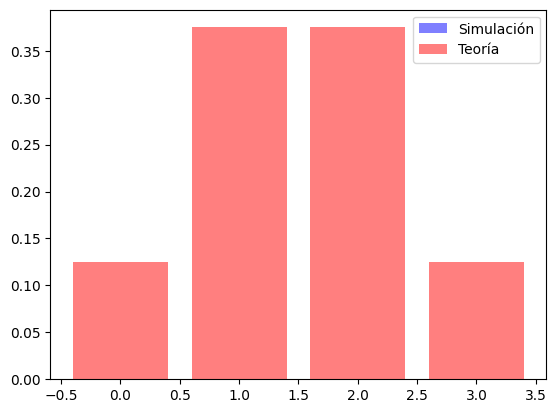

In [38]:
#Y para visuzalizar los datos de una manera más sencilla, vamos a definir una función que nos permita hacerlo

def plot_histogram(numero_intentos):
    valores_cara = [0,1,2,3]
    array = []
    for i in range(numero_intentos):
        array.append(binomial(n, p))
    lista_sim = np.unique(array, return_counts=True)[1]/len(array)
    lista_teo = [binom(3, 0.5).pmf(i) for i in valores_cara]
    plt.bar(valores_cara, lista_sim[1], color='blue', alpha=0.5, label='Simulación')
    plt.bar(valores_cara, lista_teo, color='red', alpha=0.5, label='Teoría')
    plt.legend()
    plt.show()

#Y ahora vamos a ejecutar la función para ver los resultados

plot_histogram(20000)